In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clusteringproject1/Dataset Kebotakan.csv


LOADING DATASET

In [2]:
df = pd.read_csv('/kaggle/input/clusteringproject1/Dataset Kebotakan.csv')

Import Libary

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploratory data analysis (EDA)

In [4]:
df

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,32.0,Laki-laki,Pegawai swasta,Yogyakarta,6.024409e+06,1.0,0.0,44.432438,154.578859,Deadbuoy,0.0,SMA,9.0,0.471229
7913,34.0,Laki-laki,Pegawai swasta,Manado,1.007043e+07,1.0,0.0,49.389914,158.782726,Shoulder & Head,1.0,S1,9.0,0.543821
7914,58.0,Laki-laki,Freelance,Mamuju,8.010815e+06,1.0,0.0,54.351968,154.478087,Deadbuoy,1.0,S2,6.0,0.643453
7915,30.0,NaN,PNS,Palu,9.059906e+06,1.0,0.0,57.646930,163.377717,Deadbuoy,0.0,S1,10.0,0.540056


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7832 non-null   float64
 1   jenis_kelamin  7840 non-null   object 
 2   pekerjaan      7760 non-null   object 
 3   provinsi       7831 non-null   object 
 4   gaji           7843 non-null   float64
 5   is_menikah     7845 non-null   float64
 6   is_keturunan   7828 non-null   float64
 7   berat          7861 non-null   float64
 8   tinggi         7843 non-null   float64
 9   sampo          7858 non-null   object 
 10  is_merokok     7847 non-null   float64
 11  pendidikan     7847 non-null   object 
 12  stress         7853 non-null   float64
 13  botak_prob     7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.0+ KB


In [6]:
df.isna().sum()

umur              85
jenis_kelamin     77
pekerjaan        157
provinsi          86
gaji              74
is_menikah        72
is_keturunan      89
berat             56
tinggi            74
sampo             59
is_merokok        70
pendidikan        70
stress            64
botak_prob        79
dtype: int64

In [7]:
df.nunique()

umur               71
jenis_kelamin       2
pekerjaan           4
provinsi           34
gaji             7762
is_menikah          2
is_keturunan        2
berat            7779
tinggi           7761
sampo               5
is_merokok          2
pendidikan          6
stress             10
botak_prob       7659
dtype: int64

In [8]:
target=['botak_prob']
encoded=['is_merokok','is_menikah','is_keturunan','stress']
categorical=df.nunique()[df.nunique() < 35].keys().tolist()
categorical=np.setdiff1d(categorical,encoded)
categorical=categorical.tolist()
categorical

['jenis_kelamin', 'pekerjaan', 'pendidikan', 'provinsi', 'sampo']

In [9]:
# Store numerical column names
numerical = [x for x in df.columns if x not in target + categorical + encoded]
numerical

['umur', 'gaji', 'berat', 'tinggi']

In [10]:
df.shape

(7917, 14)

In [11]:
df[df.jenis_kelamin=='Perempuan']

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
5,55.0,Perempuan,PNS,Palangkaraya,9.213032e+06,1.0,1.0,54.287045,179.235145,Pantone,0.0,S1,1.0,0.732562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7893,50.0,Perempuan,PNS,Banda Aceh,5.761347e+06,1.0,1.0,47.070635,165.468026,Pantone,0.0,S1,5.0,0.763260
7894,38.0,Perempuan,Pegawai swasta,Samarinda,6.036856e+06,1.0,1.0,63.435260,166.232035,Deadbuoy,0.0,S1,3.0,0.465002
7902,36.0,Perempuan,PNS,Sofifi,1.013030e+07,1.0,0.0,52.399783,169.221572,Moonsilk,1.0,S1,9.0,0.489838
7907,44.0,Perempuan,Freelance,Yogyakarta,1.276151e+07,1.0,0.0,49.207348,159.630458,Pantone,0.0,S1,9.0,0.388583


# Mengisi Data yang kosong (Fillna)

In [12]:
df['pendidikan'].fillna(df['pendidikan'].mode()[0], inplace=True)
df['jenis_kelamin'].fillna(df['jenis_kelamin'].mode()[0], inplace=True)
df['pekerjaan'].fillna(df['pekerjaan'].mode()[0], inplace=True)
df['provinsi'].fillna(df['provinsi'].mode()[0], inplace=True)
df['sampo'].fillna(df['sampo'].mode()[0], inplace=True)

df['is_merokok'].fillna(df['is_merokok'].mode()[0], inplace=True)
df['is_menikah'].fillna(df['is_menikah'].mode()[0], inplace=True)
df['is_keturunan'].fillna(df['is_keturunan'].mode()[0], inplace=True)
df['stress'].fillna(df['stress'].mode()[0], inplace=True)

In [13]:
mean = df["umur"].mean()
std = df["umur"].std()
is_null = df["umur"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
age_slice = df["umur"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["umur"] = age_slice

In [14]:
mean = df["gaji"].mean()
std = df["gaji"].std()
is_null = df["gaji"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
age_slice = df["gaji"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["gaji"] = age_slice

In [15]:
mean = df["berat"].mean()
std = df["berat"].std()
is_null = df["berat"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
age_slice = df["berat"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["berat"] = age_slice

In [16]:
mean = df["tinggi"].mean()
std = df["tinggi"].std()
is_null = df["tinggi"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
age_slice = df["tinggi"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["tinggi"] = age_slice

In [17]:
#Mengecek nilai kosong kembali
df.isna().sum()

umur              0
jenis_kelamin     0
pekerjaan         0
provinsi          0
gaji              0
is_menikah        0
is_keturunan      0
berat             0
tinggi            0
sampo             0
is_merokok        0
pendidikan        0
stress            0
botak_prob       79
dtype: int64

In [18]:
df=df[df.botak_prob.notnull()]
df.isna().sum()

umur             0
jenis_kelamin    0
pekerjaan        0
provinsi         0
gaji             0
is_menikah       0
is_keturunan     0
berat            0
tinggi           0
sampo            0
is_merokok       0
pendidikan       0
stress           0
botak_prob       0
dtype: int64

# Menghapus Data yang kosong (DROP)

In [19]:
df=df.drop_duplicates()

# Check Outlier

In [20]:
df_num=df[numerical]
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
low_limit=Q1-(IQR*1.5)
high_limit=Q3+(IQR*1.5)

In [21]:
((df_num < low_limit) | (df_num > high_limit)).any()

umur      True
gaji      True
berat     True
tinggi    True
dtype: bool

In [22]:
x=((df_num < low_limit) | (df_num > high_limit))
x['res']=x.any(axis=1)
x[x['res']==True]

,umur,gaji,berat,tinggi,res
11,False,True,True,False,True
12,False,True,False,False,True
32,False,False,True,False,True
50,False,True,False,False,True
83,False,False,True,False,True
...,...,...,...,...,...
7783,False,False,True,False,True
7796,False,False,True,False,True
7804,True,False,False,False,True
7822,False,True,False,False,True


In [23]:
df=df[df.index.isin(x[x.res==False].index.to_list())]
df.shape

(7110, 14)

In [24]:
df_num=df[numerical]
df_num=df_num.reset_index()
df_num

,index,umur,gaji,berat,tinggi
0,0,27.0,7.957453e+06,54.315053,170.428542
1,1,53.0,7.633003e+06,72.873404,165.530097
2,2,37.0,6.637625e+06,46.321533,154.599388
3,3,36.0,3.624871e+06,51.539781,167.340481
4,4,38.0,6.031808e+06,60.726909,165.514773
...,...,...,...,...,...
7105,7831,45.0,8.646146e+06,53.878714,170.122857
7106,7832,24.0,6.850066e+06,64.171294,161.384804
7107,7833,29.0,1.204960e+07,55.217752,179.602130
7108,7834,42.0,4.888239e+06,52.699072,186.913795


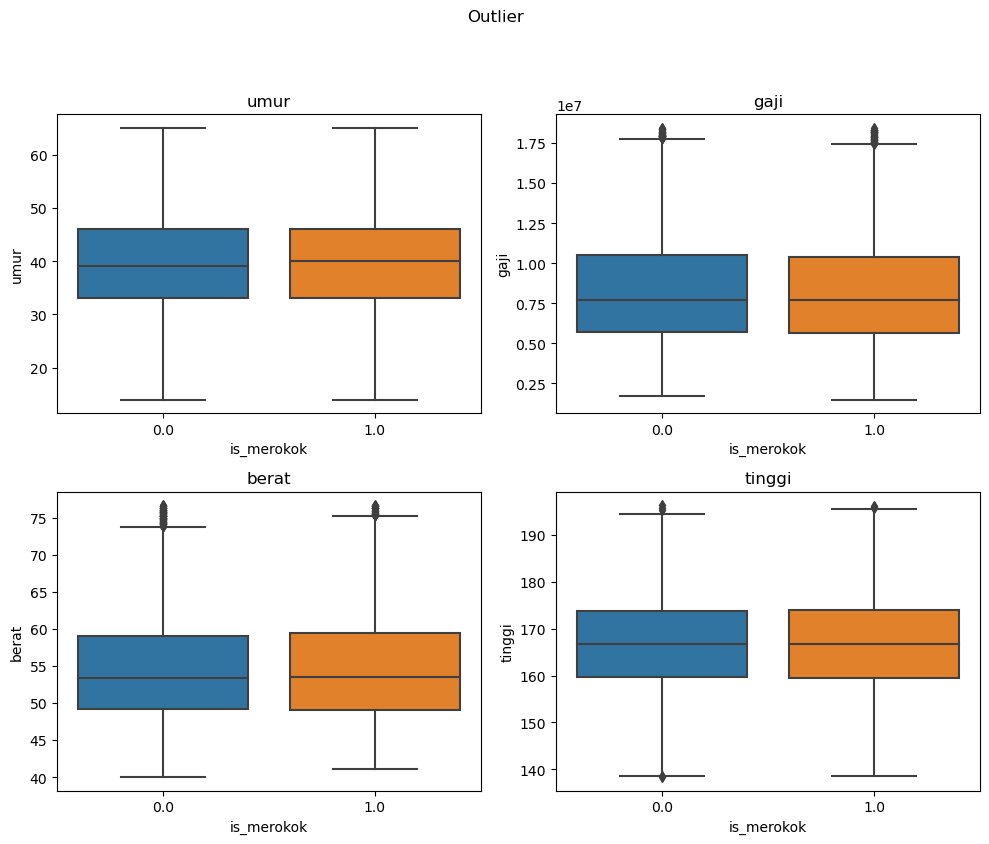

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


# Menentukan kolom yang akan digunakan untuk membuat multiple boxplot
cols = ['umur', 'gaji', 'berat', 'tinggi']

# Mengatur tata letak subplot
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))
axes = axes.ravel()  # Meratakan array subplot menjadi 1 dimensi

# Membuat multiple boxplot
for i, col in enumerate(cols):
    sns.boxplot(x='is_merokok', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)

# Mengatur tata letak gambar dan judul
plt.suptitle('Outlier', y=1.05)
plt.tight_layout()

# Menampilkan plot
plt.show()

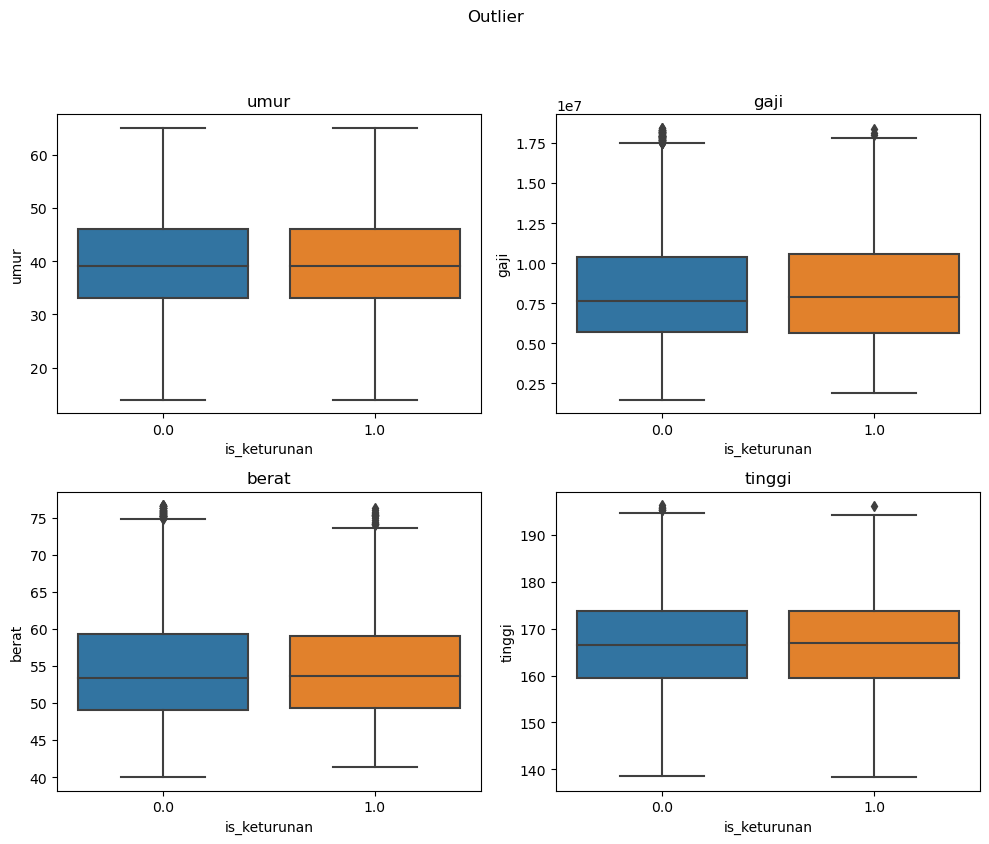

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


# Menentukan kolom yang akan digunakan untuk membuat multiple boxplot
cols = ['umur', 'gaji', 'berat', 'tinggi']

# Mengatur tata letak subplot
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))
axes = axes.ravel()  # Meratakan array subplot menjadi 1 dimensi

# Membuat multiple boxplot
for i, col in enumerate(cols):
    sns.boxplot(x='is_keturunan', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)

# Mengatur tata letak gambar dan judul
plt.suptitle('Outlier', y=1.05)
plt.tight_layout()

# Menampilkan plot
plt.show()

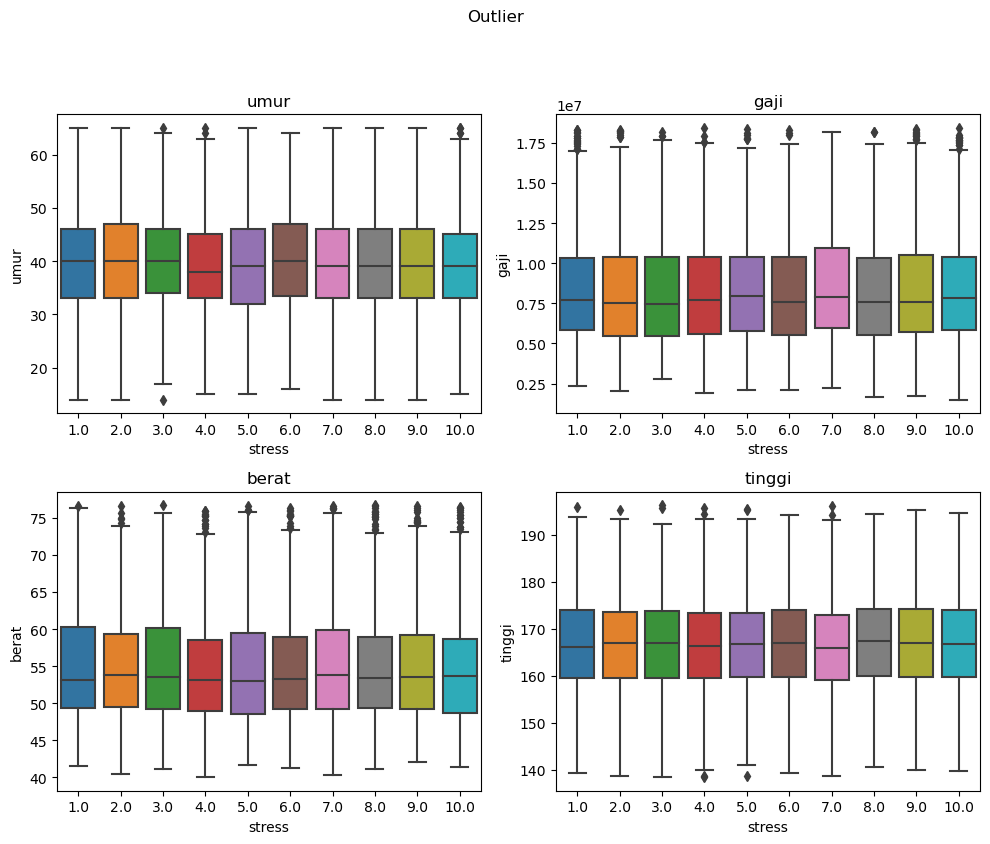

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


# Menentukan kolom yang akan digunakan untuk membuat multiple boxplot
cols = ['umur', 'gaji', 'berat', 'tinggi']

# Mengatur tata letak subplot
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))
axes = axes.ravel()  # Meratakan array subplot menjadi 1 dimensi

# Membuat multiple boxplot
for i, col in enumerate(cols):
    sns.boxplot(x='stress', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)

# Mengatur tata letak gambar dan judul
plt.suptitle('Outlier', y=1.05)
plt.tight_layout()

# Menampilkan plot
plt.show()

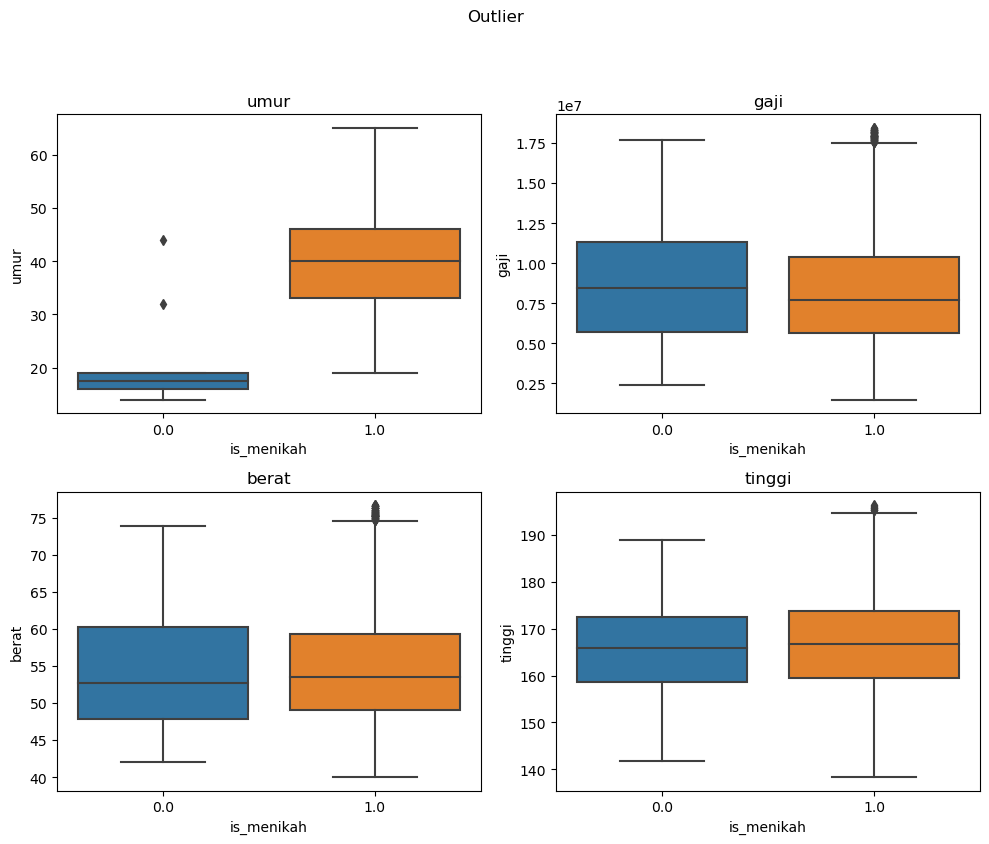

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


# Menentukan kolom yang akan digunakan untuk membuat multiple boxplot
cols = ['umur', 'gaji', 'berat', 'tinggi']

# Mengatur tata letak subplot
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))
axes = axes.ravel()  # Meratakan array subplot menjadi 1 dimensi

# Membuat multiple boxplot
for i, col in enumerate(cols):
    sns.boxplot(x='is_menikah', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)

# Mengatur tata letak gambar dan judul
plt.suptitle('Outlier', y=1.05)
plt.tight_layout()

# Menampilkan plot
plt.show()

In [29]:
df.describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,botak_prob
count,7110.000000,7.110000e+03,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000
mean,39.473840,8.314140e+06,0.983685,0.202250,54.748988,166.696809,0.496484,5.447539,0.573011
std,9.439345,3.459308e+06,0.126693,0.401706,7.422141,10.345819,0.500023,2.860225,0.173266
min,14.000000,1.500000e+06,0.000000,0.000000,40.000000,138.393811,0.000000,1.000000,0.064633
25%,33.000000,5.667939e+06,1.000000,0.000000,49.068318,159.519171,0.000000,3.000000,0.452233
50%,39.000000,7.698366e+06,1.000000,0.000000,53.441565,166.668961,0.000000,5.000000,0.567626
75%,46.000000,1.042482e+07,1.000000,0.000000,59.309157,173.773783,1.000000,8.000000,0.685760
max,65.000000,1.843116e+07,1.000000,1.000000,76.689484,196.221340,1.000000,10.000000,1.000000


In [30]:
#Import Library yang dibutuhkan
import seaborn as sns
from matplotlib.lines import Line2D
sns.set_style('darkgrid')

In [31]:
 df[categorical]

,jenis_kelamin,pekerjaan,pendidikan,provinsi,sampo
0,Perempuan,PNS,S1,Bengkulu,Pantone
1,Perempuan,PNS,S1,Bandung,Pantone
2,Perempuan,Pegawai swasta,S1,Bandung,Moonsilk
3,Perempuan,Pengangguran,SD,Palu,Deadbuoy
4,Laki-laki,Freelance,S2,Palangkaraya,Merpati
...,...,...,...,...,...
7831,Laki-laki,PNS,S1,Tanjungselor,Pantone
7832,Laki-laki,PNS,SMA,Jambi,Moonsilk
7833,Laki-laki,Pegawai swasta,SMA,Palangkaraya,Pantone
7834,Perempuan,Pegawai swasta,S2,Kendari,Deadbuoy


In [32]:
col_show=np.array(categorical)
col_show

array(['jenis_kelamin', 'pekerjaan', 'pendidikan', 'provinsi', 'sampo'],
      dtype='<U13')

In [33]:
col_show=np.union1d(col_show, np.array(encoded))

In [34]:
len(col_show.tolist())

9

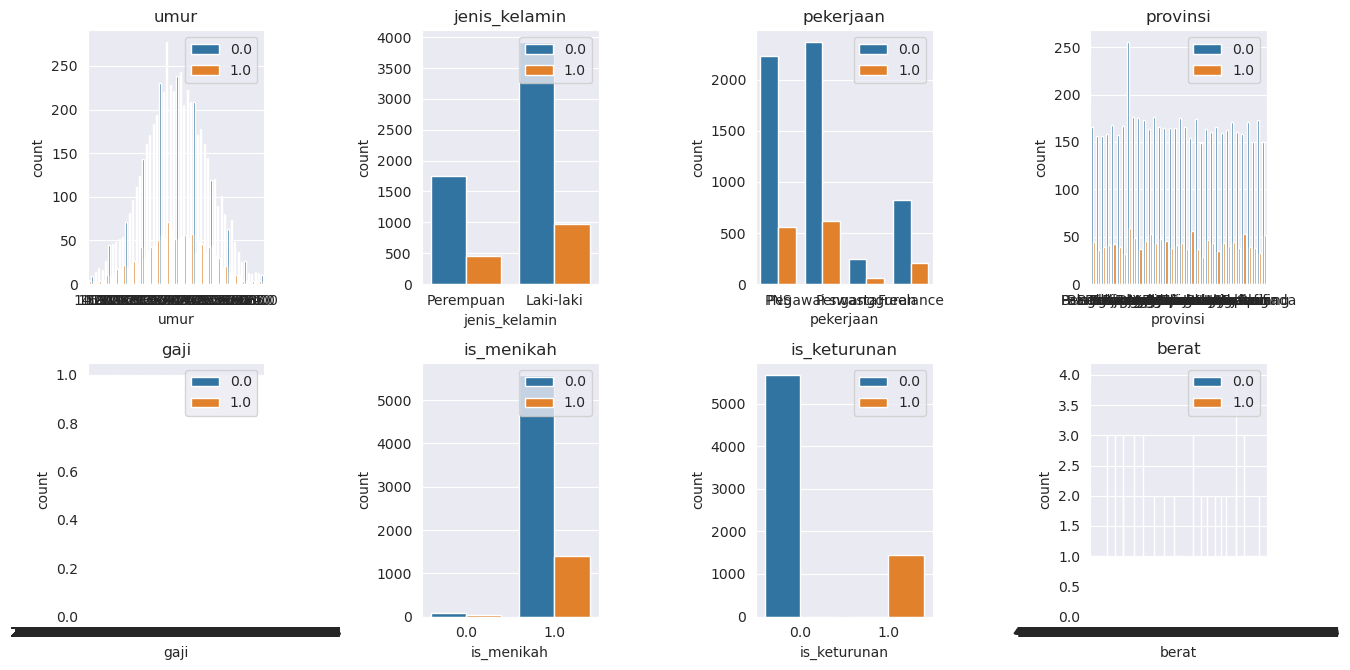

In [35]:
col=df.columns

n_rows=2
n_cols=4

fig,axis=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.4,n_rows*3.4))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axis[r][c]
        sns.countplot(x=df[col[i]],data=df,hue=df["is_keturunan"],ax=ax)
        ax.set_title(col[i])
        ax.legend(loc='upper right')

plt.tight_layout()

col:umur


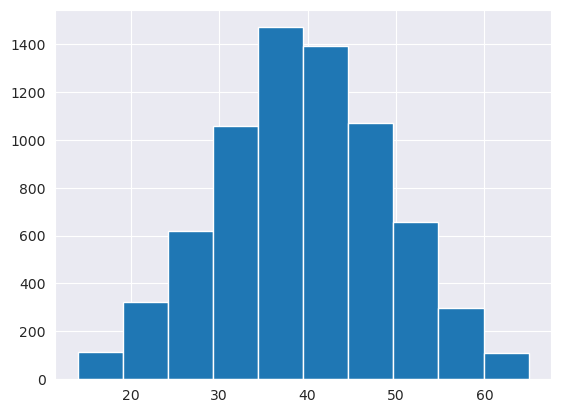

col:gaji


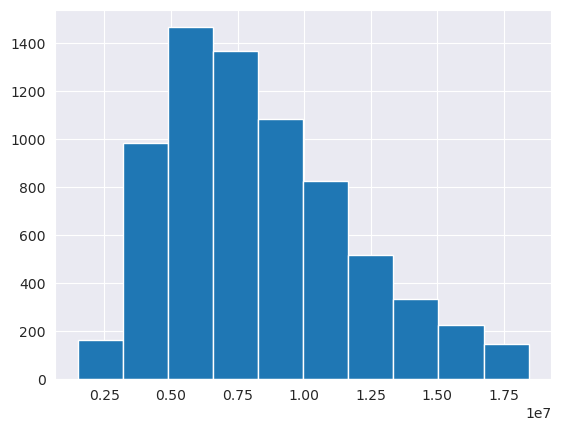

col:berat


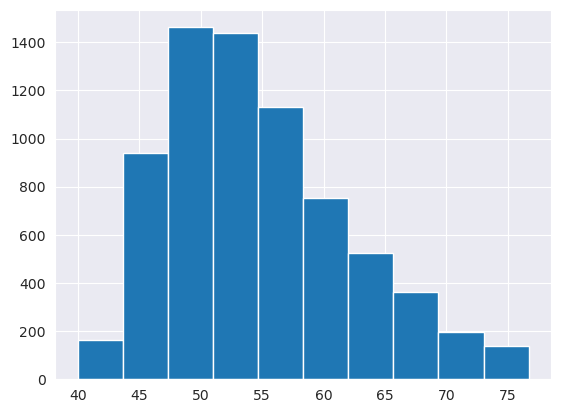

col:tinggi


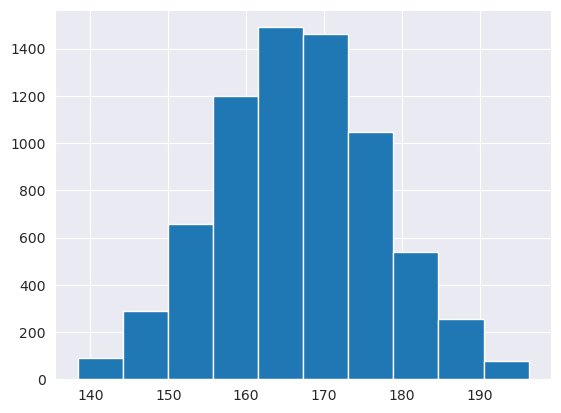

In [36]:
for x in numerical:
    plt.hist(df[x])
    print('col:'+ x)
    plt.show()

In [37]:
df.columns

Index(['umur', 'jenis_kelamin', 'pekerjaan', 'provinsi', 'gaji', 'is_menikah',
       'is_keturunan', 'berat', 'tinggi', 'sampo', 'is_merokok', 'pendidikan',
       'stress', 'botak_prob'],
      dtype='object')

In [38]:
prob_65=df[df.botak_prob>0.65]
prob_65

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
5,55.0,Perempuan,PNS,Palangkaraya,9.213032e+06,1.0,1.0,54.287045,179.235145,Pantone,0.0,S1,1.0,0.732562
14,45.0,Laki-laki,PNS,Tanjung Pinang,1.211718e+07,1.0,1.0,54.548239,167.855936,Moonsilk,1.0,S1,3.0,1.000000
17,54.0,Laki-laki,Pegawai swasta,Mamuju,1.147456e+07,1.0,0.0,69.381971,175.132923,Pantone,1.0,S1,6.0,0.759691
19,38.0,Laki-laki,Pengangguran,Banda Aceh,1.087815e+07,1.0,0.0,53.103794,187.817838,Deadbuoy,0.0,S1,9.0,0.931565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7821,22.0,Laki-laki,PNS,Jakarta,3.206320e+06,1.0,1.0,49.986943,179.078973,Pantone,1.0,S1,3.0,0.771153
7824,45.0,Laki-laki,PNS,Jambi,5.398506e+06,1.0,0.0,48.060396,163.335322,Shoulder & Head,0.0,S1,9.0,0.735937
7826,42.0,Laki-laki,PNS,Pontianak,4.282852e+06,1.0,1.0,71.913849,171.811292,Shoulder & Head,1.0,S1,5.0,0.921812
7830,52.0,Laki-laki,PNS,Manokwari,4.286318e+06,1.0,0.0,46.893444,169.880171,Deadbuoy,1.0,SMA,2.0,0.773141


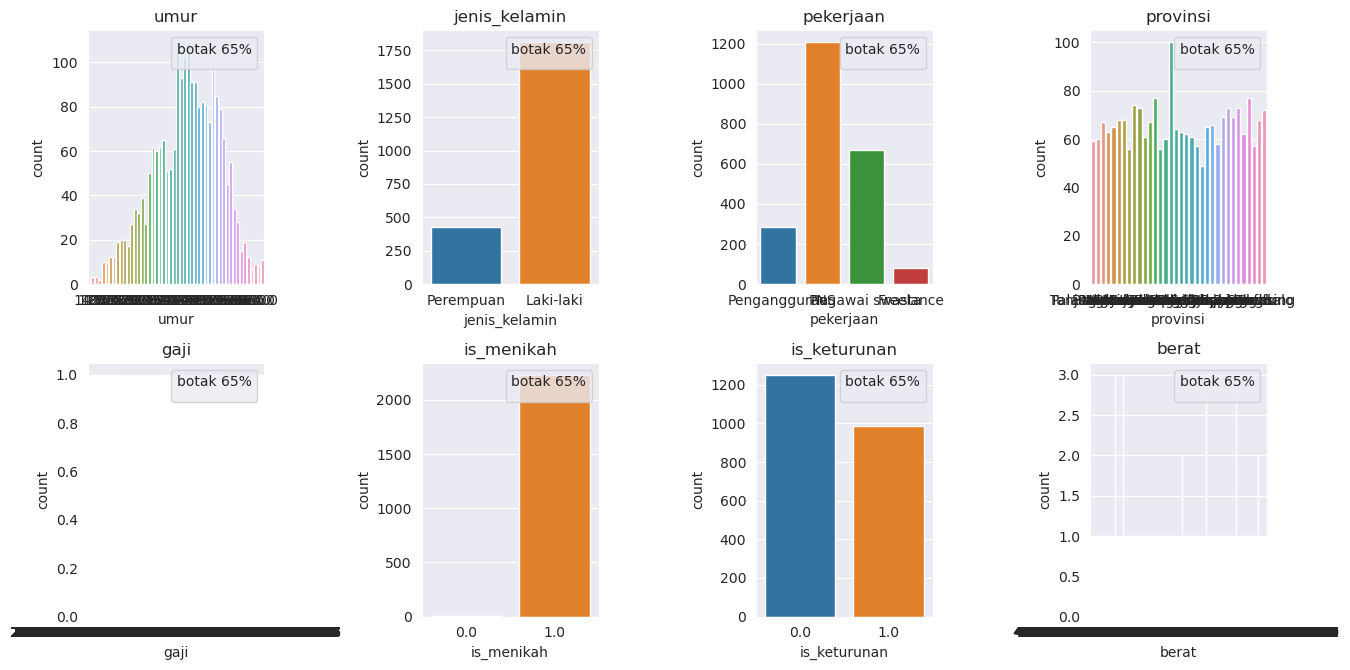

In [39]:
col=df.columns

n_rows=2
n_cols=4

fig,axis=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.4,n_rows*3.4))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        ax=axis[r][c]
        sns.countplot(x=prob_65[col[i]],data=df,ax=ax)
        ax.set_title(col[i])
        ax.legend(title="botak 65%", loc='upper right')

plt.tight_layout()

# DROP

In [40]:
df=df.drop(columns=['sampo','provinsi'])

# ENCODING

In [41]:
categorical

['jenis_kelamin', 'pekerjaan', 'pendidikan', 'provinsi', 'sampo']

In [42]:
np.array(categorical)

array(['jenis_kelamin', 'pekerjaan', 'pendidikan', 'provinsi', 'sampo'],
      dtype='<U13')

In [43]:
categorical=['jenis_kelamin','pekerjaan','pendidikan']

In [44]:
df[categorical]

,jenis_kelamin,pekerjaan,pendidikan
0,Perempuan,PNS,S1
1,Perempuan,PNS,S1
2,Perempuan,Pegawai swasta,S1
3,Perempuan,Pengangguran,SD
4,Laki-laki,Freelance,S2
...,...,...,...
7831,Laki-laki,PNS,S1
7832,Laki-laki,PNS,SMA
7833,Laki-laki,Pegawai swasta,SMA
7834,Perempuan,Pegawai swasta,S2


In [45]:
onhot=['jenis_kelamin','pekerjaan']

In [46]:
df.columns

Index(['umur', 'jenis_kelamin', 'pekerjaan', 'gaji', 'is_menikah',
       'is_keturunan', 'berat', 'tinggi', 'is_merokok', 'pendidikan', 'stress',
       'botak_prob'],
      dtype='object')

In [47]:
df=pd.get_dummies(data = df, columns = onhot)
df

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,pendidikan,stress,botak_prob,jenis_kelamin_Laki-laki,jenis_kelamin_Perempuan,pekerjaan_Freelance,pekerjaan_PNS,pekerjaan_Pegawai swasta,pekerjaan_Pengangguran
0,27.0,7.957453e+06,1.0,0.0,54.315053,170.428542,1.0,S1,5.0,0.605974,0,1,0,1,0,0
1,53.0,7.633003e+06,1.0,0.0,72.873404,165.530097,0.0,S1,7.0,0.532860,0,1,0,1,0,0
2,37.0,6.637625e+06,1.0,0.0,46.321533,154.599388,0.0,S1,4.0,0.418442,0,1,0,0,1,0
3,36.0,3.624871e+06,1.0,0.0,51.539781,167.340481,1.0,SD,9.0,0.804050,0,1,0,0,0,1
4,38.0,6.031808e+06,1.0,0.0,60.726909,165.514773,1.0,S2,1.0,0.368371,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831,45.0,8.646146e+06,1.0,0.0,53.878714,170.122857,0.0,S1,2.0,0.604058,1,0,0,1,0,0
7832,24.0,6.850066e+06,1.0,0.0,64.171294,161.384804,0.0,SMA,8.0,0.502413,1,0,0,1,0,0
7833,29.0,1.204960e+07,1.0,0.0,55.217752,179.602130,1.0,SMA,6.0,0.562664,1,0,0,0,1,0
7834,42.0,4.888239e+06,1.0,0.0,52.699072,186.913795,0.0,S2,2.0,0.273705,0,1,0,0,1,0


In [48]:
df.pendidikan.unique()

array(['S1', 'SD', 'S2', 'SMA', 'SMP', 'S3'], dtype=object)

In [49]:
df=df.drop(columns=['jenis_kelamin_Perempuan'])

In [50]:
pendidikan = {"SD": 0, "SMP": 1, "SMA": 2, "S1": 3, "S2": 4, "S3": 5}
df['pendidikan'] = df['pendidikan'].map(pendidikan)
df

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,pendidikan,stress,botak_prob,jenis_kelamin_Laki-laki,pekerjaan_Freelance,pekerjaan_PNS,pekerjaan_Pegawai swasta,pekerjaan_Pengangguran
0,27.0,7.957453e+06,1.0,0.0,54.315053,170.428542,1.0,3,5.0,0.605974,0,0,1,0,0
1,53.0,7.633003e+06,1.0,0.0,72.873404,165.530097,0.0,3,7.0,0.532860,0,0,1,0,0
2,37.0,6.637625e+06,1.0,0.0,46.321533,154.599388,0.0,3,4.0,0.418442,0,0,0,1,0
3,36.0,3.624871e+06,1.0,0.0,51.539781,167.340481,1.0,0,9.0,0.804050,0,0,0,0,1
4,38.0,6.031808e+06,1.0,0.0,60.726909,165.514773,1.0,4,1.0,0.368371,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831,45.0,8.646146e+06,1.0,0.0,53.878714,170.122857,0.0,3,2.0,0.604058,1,0,1,0,0
7832,24.0,6.850066e+06,1.0,0.0,64.171294,161.384804,0.0,2,8.0,0.502413,1,0,1,0,0
7833,29.0,1.204960e+07,1.0,0.0,55.217752,179.602130,1.0,2,6.0,0.562664,1,0,0,1,0
7834,42.0,4.888239e+06,1.0,0.0,52.699072,186.913795,0.0,4,2.0,0.273705,0,0,0,1,0


# FEATURE SELECTION

<AxesSubplot:>

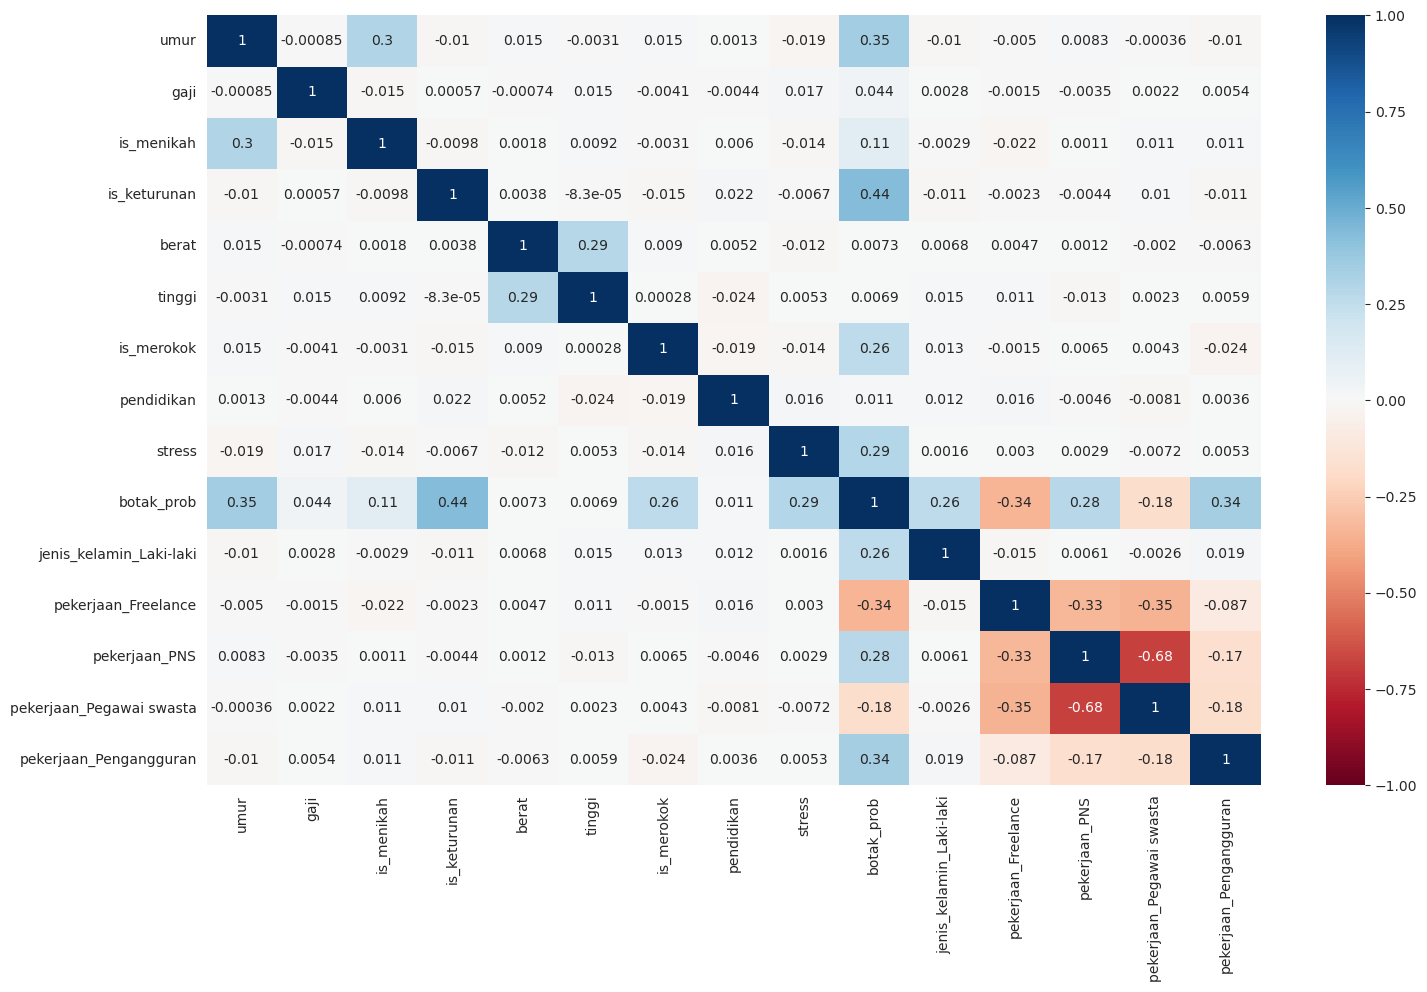

In [51]:
#Melihat Korelasi antar feature
fig, ax = plt.subplots(figsize=(17,10)) 
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)

# FEATURE SCALLING

In [52]:
df.describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,pendidikan,stress,botak_prob,jenis_kelamin_Laki-laki,pekerjaan_Freelance,pekerjaan_PNS,pekerjaan_Pegawai swasta,pekerjaan_Pengangguran
count,7110.000000,7.110000e+03,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000
mean,39.473840,8.314140e+06,0.983685,0.202250,54.748988,166.696809,0.496484,2.636990,5.447539,0.573011,0.687764,0.145570,0.392264,0.419691,0.042475
std,9.439345,3.459308e+06,0.126693,0.401706,7.422141,10.345819,0.500023,0.907299,2.860225,0.173266,0.463438,0.352699,0.488289,0.493543,0.201685
min,14.000000,1.500000e+06,0.000000,0.000000,40.000000,138.393811,0.000000,0.000000,1.000000,0.064633,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,5.667939e+06,1.000000,0.000000,49.068318,159.519171,0.000000,2.000000,3.000000,0.452233,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,7.698366e+06,1.000000,0.000000,53.441565,166.668961,0.000000,3.000000,5.000000,0.567626,1.000000,0.000000,0.000000,0.000000,0.000000
75%,46.000000,1.042482e+07,1.000000,0.000000,59.309157,173.773783,1.000000,3.000000,8.000000,0.685760,1.000000,0.000000,1.000000,1.000000,0.000000
max,65.000000,1.843116e+07,1.000000,1.000000,76.689484,196.221340,1.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
numerical

['umur', 'gaji', 'berat', 'tinggi']

In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical].values)
df

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,pendidikan,stress,botak_prob,jenis_kelamin_Laki-laki,pekerjaan_Freelance,pekerjaan_PNS,pekerjaan_Pegawai swasta,pekerjaan_Pengangguran
0,-1.321566,-0.103117,1.0,0.0,-0.058469,0.360725,1.0,3,5.0,0.605974,0,0,1,0,0
1,1.433056,-0.196914,1.0,0.0,2.442111,-0.112779,0.0,3,7.0,0.532860,0,0,1,0,0
2,-0.262096,-0.484673,1.0,0.0,-1.135528,-1.169388,0.0,3,4.0,0.418442,0,0,0,1,0
3,-0.368043,-1.355646,1.0,0.0,-0.432413,0.062220,1.0,0,9.0,0.804050,0,0,0,0,1
4,-0.156149,-0.659812,1.0,0.0,0.805474,-0.114261,1.0,4,1.0,0.368371,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831,0.585480,0.095982,1.0,0.0,-0.117262,0.331176,0.0,3,2.0,0.604058,1,0,1,0,0
7832,-1.639407,-0.423257,1.0,0.0,1.269575,-0.513481,0.0,2,8.0,0.502413,1,0,1,0,0
7833,-1.109672,1.079905,1.0,0.0,0.063162,1.247483,1.0,2,6.0,0.562664,1,0,0,1,0
7834,0.267639,-0.990412,1.0,0.0,-0.276209,1.954259,0.0,4,2.0,0.273705,0,0,0,1,0


In [55]:
df[numerical].describe()

,umur,gaji,berat,tinggi
count,7.110000e+03,7.110000e+03,7.110000e+03,7.110000e+03
mean,3.277891e-16,7.445209e-17,4.397170e-16,-6.320932e-16
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.698877e+00,-1.969937e+00,-1.987300e+00,-2.735887e+00
25%,-6.858839e-01,-7.650046e-01,-7.654219e-01,-6.938207e-01
50%,-5.020189e-02,-1.780174e-01,-1.761641e-01,-2.691871e-03
75%,6.914272e-01,6.101890e-01,6.144439e-01,6.840901e-01
max,2.704420e+00,2.924785e+00,2.956295e+00,2.853965e+00


# Model Regresion

In [56]:
y=df['botak_prob']
X=df.drop(columns='botak_prob')

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
#liner Regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [60]:
y_hat = model.predict(X_test)
MAE = mean_absolute_error(y_hat,y_test)
MSE = mean_squared_error(y_hat,y_test)
MAPE = mean_absolute_percentage_error(y_hat,y_test)
print(MAE, MSE,MAPE)

0.05195924113714916 0.005243142450934169 0.09852889043750174


Text(0.5, 1.0, 'Actual')

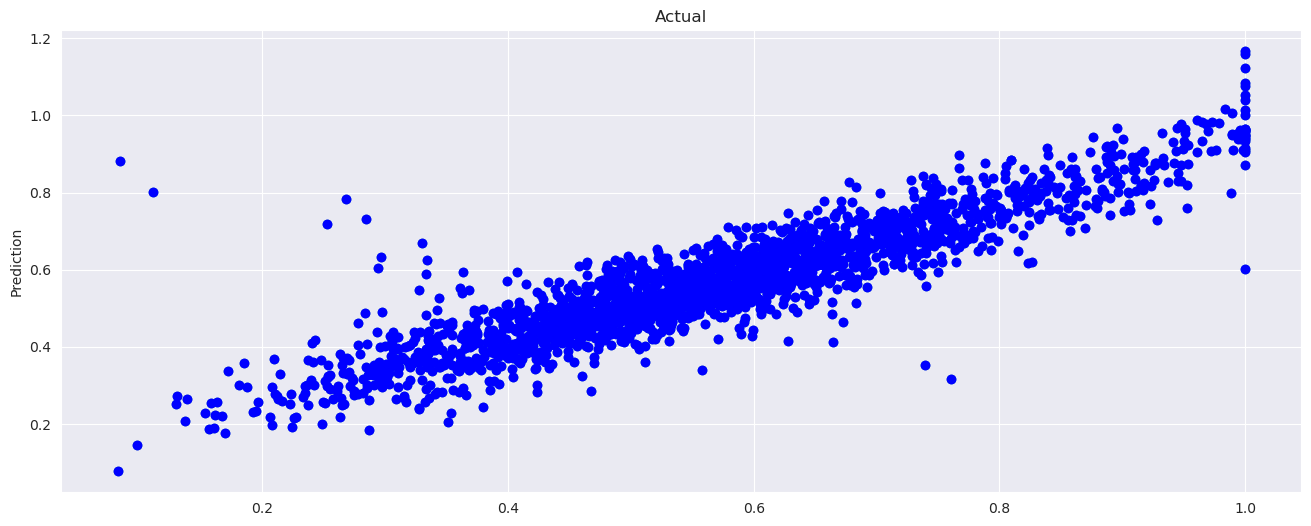

In [61]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(16,6))
axes.plot(y_test,y_hat,'o')
axes.plot(y_test,y_hat,'o',color='blue')
axes.set_ylabel("Prediction")
axes.set_title("Actual")

# #linier Regresion Polynomial

In [62]:
#linier Regresion Polynomial
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [63]:
model = LinearRegression()
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
MAE = mean_absolute_error(y_hat,y_test)
MSE = mean_squared_error(y_hat,y_test)
MAPE = mean_absolute_percentage_error(y_hat,y_test)
print(MAE, MSE,MAPE)

0.05076469210637292 0.0050260468749490925 0.09536434388915316


<AxesSubplot:ylabel='botak_prob'>

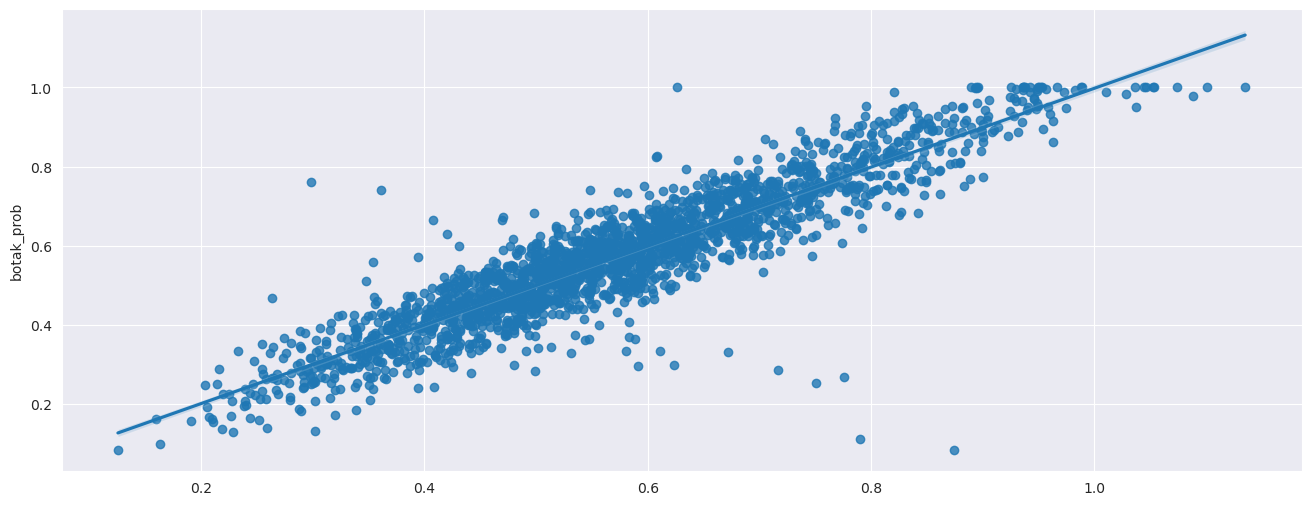

In [64]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(16,6))
sns.regplot(x=y_hat,y=y_test)

# #ridge Regresion l2

In [65]:
#ridge Regresion l2
from sklearn.linear_model import Ridge
r_model=Ridge()
r_model.fit(X_train,y_train)

y_hat = r_model.predict(X_test)
MAE = mean_absolute_error(y_hat,y_test)
MSE = mean_squared_error(y_hat,y_test)
MAPE = mean_absolute_percentage_error(y_hat,y_test)
print(MAE, MSE,MAPE)
# Usual ridge 0.05264251160845767 0.0051117217554203865 0.10084295559532598

0.050782079036756286 0.0050229641132347345 0.0954117657933562


<AxesSubplot:ylabel='botak_prob'>

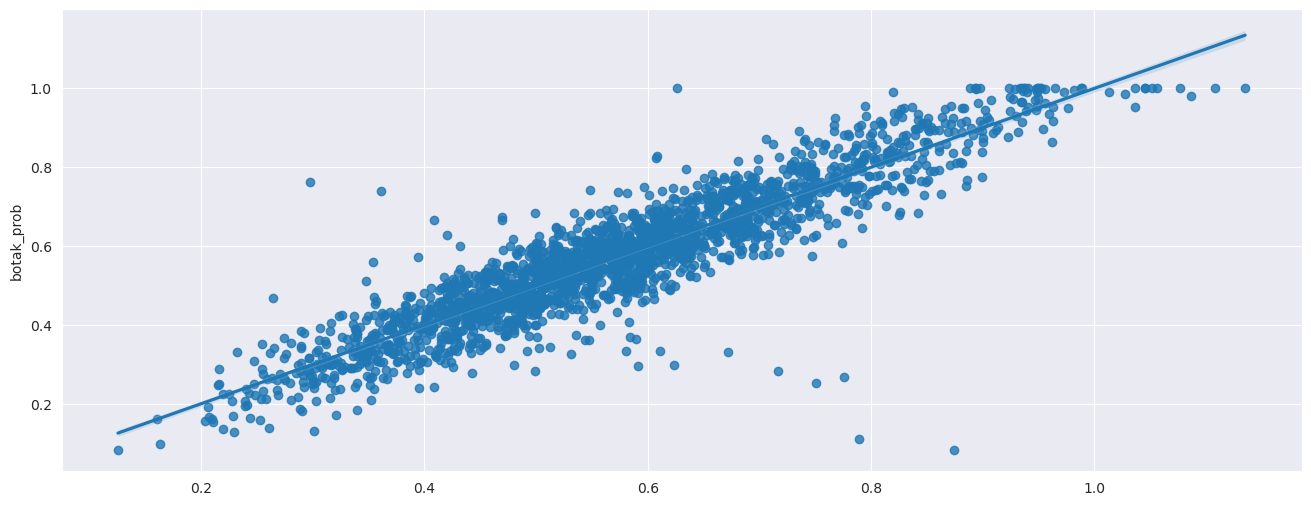

In [66]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(16,6))
sns.regplot(x=y_hat,y=y_test)

# #Lasso L1

In [67]:
#Lasso L1
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train,y_train)

y_hat = lasso_cv_model.predict(X_test)
MAE = mean_absolute_error(y_hat,y_test)
MSE = mean_squared_error(y_hat,y_test)
MAPE = mean_absolute_percentage_error(y_hat,y_test)
#usual laso 0.0913368764137909 0.014651720197808872 0.16405522266339276
print(MAE, MSE,MAPE)

0.12175625981677972 0.02404497409696256 0.21361173818525894


<AxesSubplot:ylabel='botak_prob'>

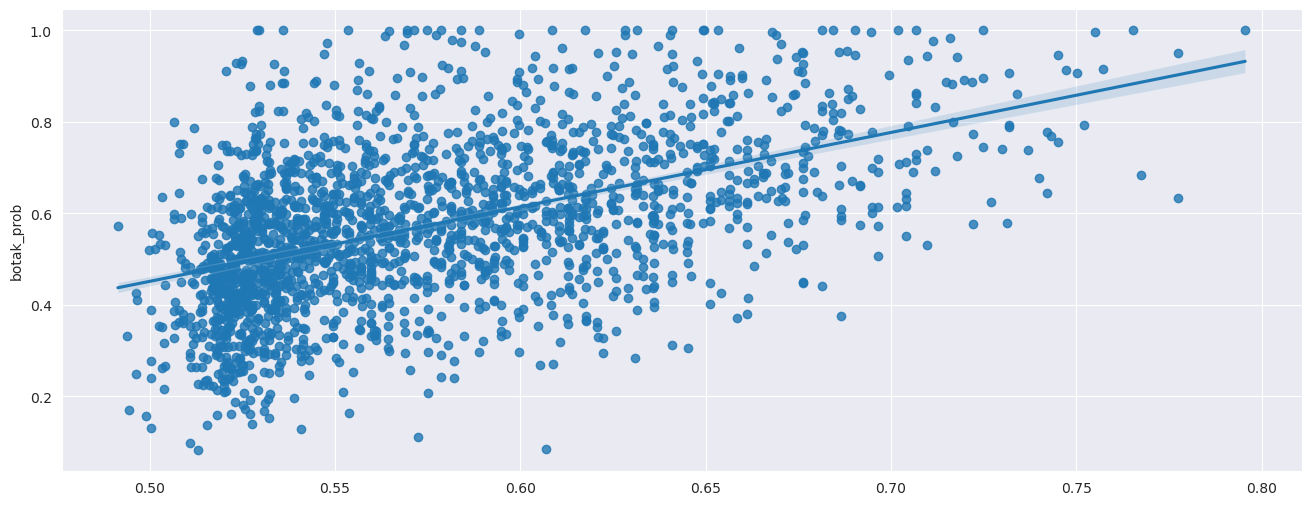

In [68]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(16,6))
sns.regplot(x=y_hat,y=y_test)

# #elasticnet

In [69]:
#elasticnet
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
elastic_model.fit(X_train,y_train)

y_hat = elastic_model.predict(X_test)
MAE = mean_absolute_error(y_hat,y_test)
MSE = mean_squared_error(y_hat,y_test)
MAPE = mean_absolute_percentage_error(y_hat,y_test)
#usal 0.052697827072299364 0.0051164791054045065 0.10090070119397132
print(MAE, MSE,MAPE)

0.054601314055977436 0.005673107758291836 0.10268954960453393


<AxesSubplot:ylabel='botak_prob'>

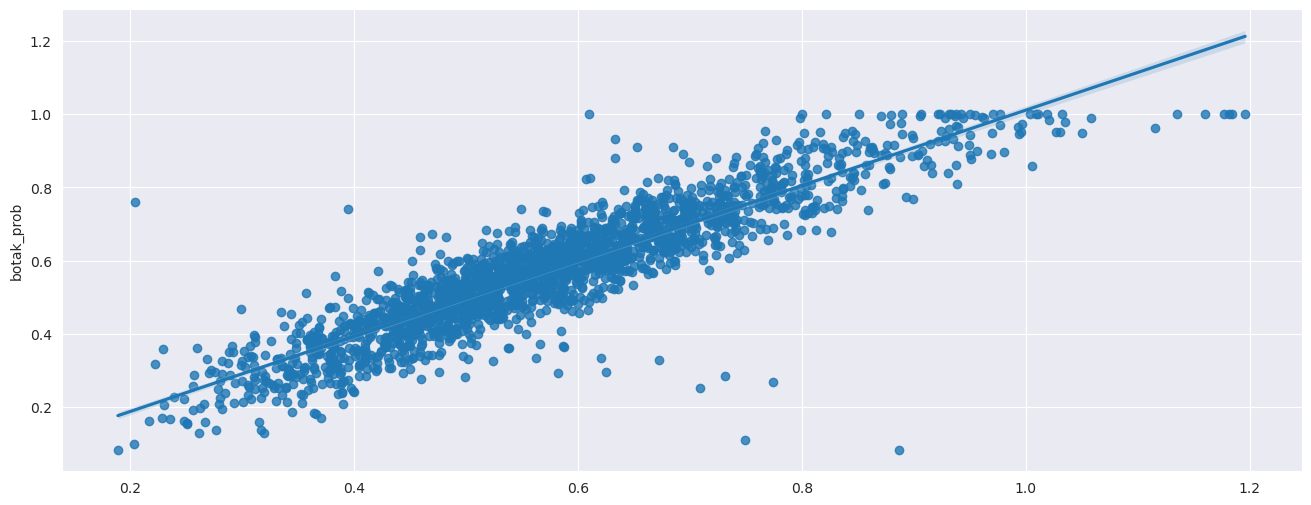

In [70]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(16,6))
sns.regplot(x=y_hat,y=y_test)

# Another Model
# 

In [71]:
y=df['botak_prob']
X=df.drop(columns='botak_prob')

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
my_model=[RandomForestRegressor(),DecisionTreeRegressor(),SVR(),LinearRegression()]
model_name=['rf','dt','svr','lr']

RandomForestRegressor()
MAE: 0.05063439374807932
MSE: 0.005194773931356957
MAPE: 0.09612152919752333


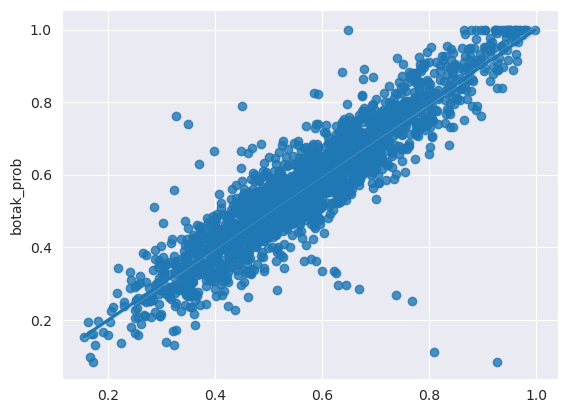

DecisionTreeRegressor()
MAE: 0.06828883468775683
MSE: 0.009404763749512199
MAPE: 0.13760889775680463


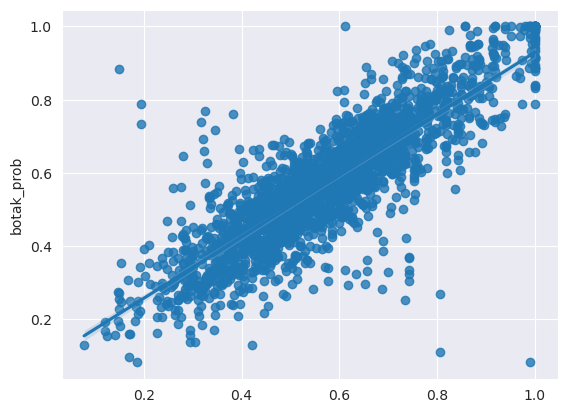

SVR()
MAE: 0.051633089088264555
MSE: 0.005101091396988941
MAPE: 0.09689557750488288


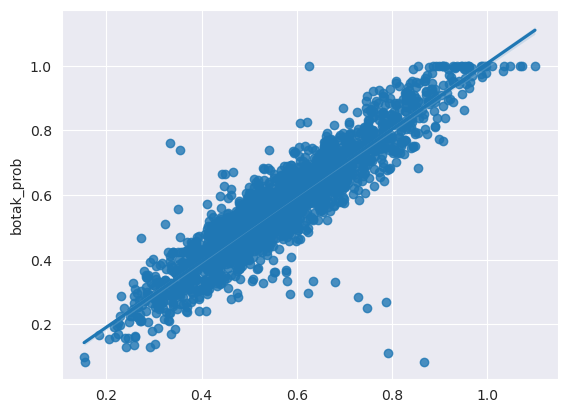

LinearRegression()
MAE: 0.05195924113714916
MSE: 0.005243142450934169
MAPE: 0.09852889043750174


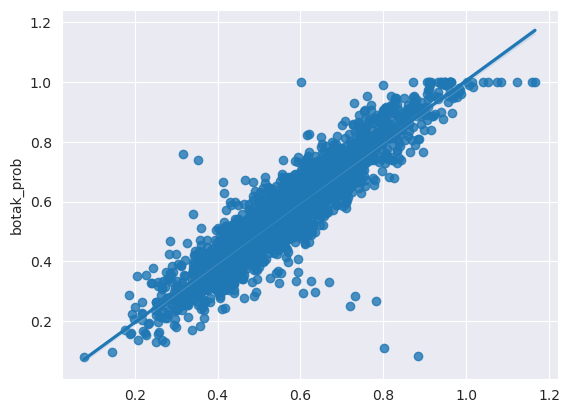

In [75]:
for modeling in my_model:
    print(modeling)
    model=modeling
    model=model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    MAE = mean_absolute_error(y_hat,y_test)
    MSE = mean_squared_error(y_hat,y_test)
    MAPE = mean_absolute_percentage_error(y_hat,y_test)
    print('MAE: '+str(MAE))
    print('MSE: '+str(MSE))
    print('MAPE: '+str(MAPE))
    sns.regplot(x=y_hat,y=y_test)
    plt.show()

# linier Regresion Polynomial

In [76]:
#linier Regresion Polynomial
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

RandomForestRegressor()
MAE: 0.05020736552637486
MSE: 0.00506508533835724
MAPE: 0.09505787285240645


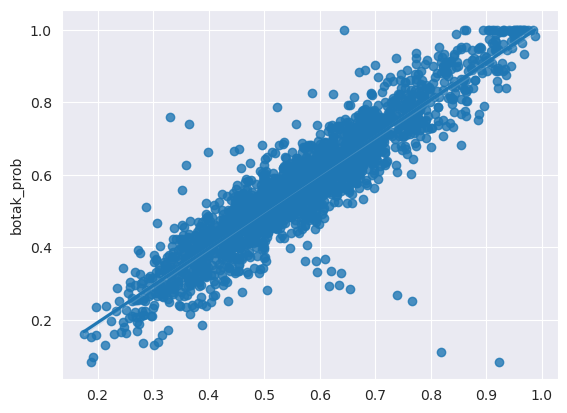

DecisionTreeRegressor()
MAE: 0.07051470231467516
MSE: 0.009666085152862616
MAPE: 0.14636734559338802


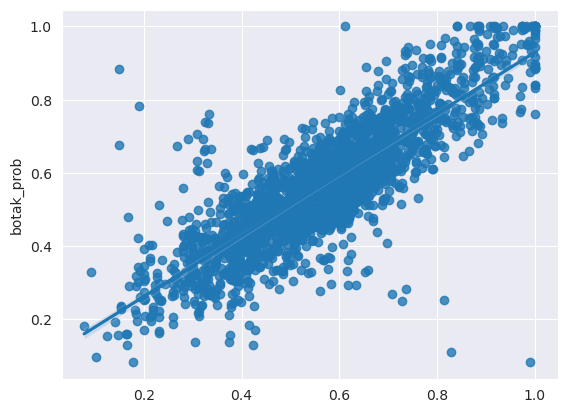

SVR()
MAE: 0.05348385505176438
MSE: 0.00540631615783485
MAPE: 0.1004241867043263


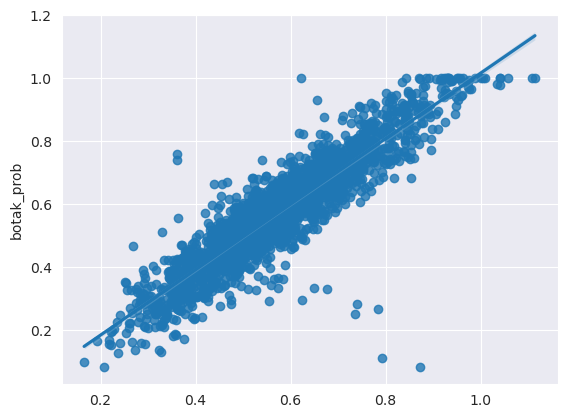

LinearRegression()
MAE: 0.05076469210637292
MSE: 0.0050260468749490925
MAPE: 0.09536434388915316


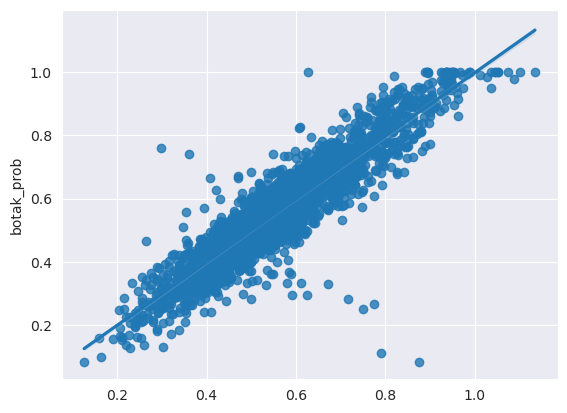

In [77]:
for modeling in my_model:
    print(modeling)
    model=modeling
    model=model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    MAE = mean_absolute_error(y_hat,y_test)
    MSE = mean_squared_error(y_hat,y_test)
    MAPE = mean_absolute_percentage_error(y_hat,y_test)
    print('MAE: '+str(MAE))
    print('MSE: '+str(MSE))
    print('MAPE: '+str(MAPE))
    sns.regplot(x=y_hat,y=y_test)
    plt.show()

In [78]:
#best model
rf=RandomForestRegressor()
rf=rf.fit(X_train,y_train)

# Tuning RF

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#criterion=['absolute_error','squared_error']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [81]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf=RandomForestRegressor()
rf=rf.fit(X_train,y_train)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  14.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.2min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  12.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   8.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  53.5s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  11.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  10.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  10.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  11.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  10.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   8.6s
[CV] END bootstrap=False, max_depth=30, 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

# SAVE MODEL

In [82]:
import pickle
filename = 'random_forest_regresor_model.sav'
pickle.dump(rf, open(filename, 'wb'))

# Load Model

In [83]:
loaded_model = pickle.load(open(filename, 'rb'))


In [84]:
result =  loaded_model.predict(X_test)
print(result)

[0.44947302 0.63238756 0.82101584 ... 0.58490844 0.54520549 0.60734359]


# DATA BARU

In [85]:
new_df = pd.DataFrame({'umur' : [34,35,40,22], 
                       'jenis_kelamin' : ['Laki-laki','Laki-laki','Laki-laki','Laki-laki'], 
                       'pekerjaan' : ['Pegawai swasta','Pengangguran','PNS','Freelance'], 
                       'is_menikah' : [1,0,1,0], 
                       'is_keturunan' : [1,0,0,1], 
                       'berat' : [60,56,70,90], 
                       'tinggi' : [177,189,160,165],
                       'is_merokok' : [1,1,1,0], 
                       'gaji' : [1000000,1000,20000000,10000000000], 
                       'stress' : [1,9,3,4], 
                       'is_merokok' : [1,1,1,0], 
                       'pendidikan' : ['S3','SMA','S1','S2']}).reset_index() 

new_df

,index,umur,jenis_kelamin,pekerjaan,is_menikah,is_keturunan,berat,tinggi,is_merokok,gaji,stress,pendidikan
0,0,34,Laki-laki,Pegawai swasta,1,1,60,177,1,1000000,1,S3
1,1,35,Laki-laki,Pengangguran,0,0,56,189,1,1000,9,SMA
2,2,40,Laki-laki,PNS,1,0,70,160,1,20000000,3,S1
3,3,22,Laki-laki,Freelance,0,1,90,165,0,10000000000,4,S2


In [86]:
df.columns

Index(['umur', 'gaji', 'is_menikah', 'is_keturunan', 'berat', 'tinggi',
       'is_merokok', 'pendidikan', 'stress', 'botak_prob',
       'jenis_kelamin_Laki-laki', 'pekerjaan_Freelance', 'pekerjaan_PNS',
       'pekerjaan_Pegawai swasta', 'pekerjaan_Pengangguran'],
      dtype='object')

In [87]:
new_df=pd.get_dummies(data = new_df, columns = onhot)
new_df

,index,umur,is_menikah,is_keturunan,berat,tinggi,is_merokok,gaji,stress,pendidikan,jenis_kelamin_Laki-laki,pekerjaan_Freelance,pekerjaan_PNS,pekerjaan_Pegawai swasta,pekerjaan_Pengangguran
0,0,34,1,1,60,177,1,1000000,1,S3,1,0,0,1,0
1,1,35,0,0,56,189,1,1000,9,SMA,1,0,0,0,1
2,2,40,1,0,70,160,1,20000000,3,S1,1,0,1,0,0
3,3,22,0,1,90,165,0,10000000000,4,S2,1,1,0,0,0


In [88]:
pendidikan = {"SD": 0, "SMP": 1, "SMA": 2, "S1": 3, "S2": 4, "S3": 5}
new_df['pendidikan'] = new_df['pendidikan'].map(pendidikan)
new_df

,index,umur,is_menikah,is_keturunan,berat,tinggi,is_merokok,gaji,stress,pendidikan,jenis_kelamin_Laki-laki,pekerjaan_Freelance,pekerjaan_PNS,pekerjaan_Pegawai swasta,pekerjaan_Pengangguran
0,0,34,1,1,60,177,1,1000000,1,5,1,0,0,1,0
1,1,35,0,0,56,189,1,1000,9,2,1,0,0,0,1
2,2,40,1,0,70,160,1,20000000,3,3,1,0,1,0,0
3,3,22,0,1,90,165,0,10000000000,4,4,1,1,0,0,0


In [89]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=StandardScaler()
new_df[numerical] = scaler.fit_transform(new_df[numerical].values)
new_df

,index,umur,is_menikah,is_keturunan,berat,tinggi,is_merokok,gaji,stress,pendidikan,jenis_kelamin_Laki-laki,pekerjaan_Freelance,pekerjaan_PNS,pekerjaan_Pegawai swasta,pekerjaan_Pengangguran
0,0,0.189117,1,1,-0.684257,0.378339,1,-0.578736,1,5,1,0,0,1,0
1,1,0.340411,0,0,-0.988372,1.446589,1,-0.578967,9,2,1,0,0,0,1
2,2,1.096881,1,0,0.076029,-1.135016,1,-0.574345,3,3,1,0,1,0,0
3,3,-1.626409,0,1,1.596600,-0.689912,0,1.732048,4,4,1,1,0,0,0
